In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics.pairwise import cosine_similarity


from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    

In [2]:
df = pd.read_csv("C:/Users/DELL/Desktop/Quarter_3/Speech_Processing/Project/Data/features_3_sec.csv")

In [3]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.63090,1972.744388,117335.77160,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.69087,2010.051501,65671.87567,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.43760,2084.565132,75124.92172,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.28450,1960.039988,82913.63927,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.26765,1948.503884,60204.02027,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


EDA - Exploratory Data Analysis

In [4]:
df.shape


(9990, 60)

In [5]:
df.info() # infos about the samples, features and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

C:\Users\DELL\AppData\Local\Temp\ipykernel_19432\2083220630.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0, 0.5, 'chroma_stft_mean'),
  Text(0, 1.5, 'rms_mean'),
  Text(0, 2.5, 'spectral_centroid_mean'),
  Text(0, 3.5, 'spectral_bandwidth_mean'),
  Text(0, 4.5, 'rolloff_mean'),
  Text(0, 5.5, 'zero_crossing_rate_mean'),
  Text(0, 6.5, 'harmony_mean'),
  Text(0, 7.5, 'perceptr_mean'),
  Text(0, 8.5, 'mfcc1_mean'),
  Text(0, 9.5, 'mfcc2_mean'),
  Text(0, 10.5, 'mfcc3_mean'),
  Text(0, 11.5, 'mfcc4_mean'),
  Text(0, 12.5, 'mfcc5_mean'),
  Text(0, 13.5, 'mfcc6_mean'),
  Text(0, 14.5, 'mfcc7_mean'),
  Text(0, 15.5, 'mfcc8_mean'),
  Text(0, 16.5, 'mfcc9_mean'),
  Text(0, 17.5, 'mfcc10_mean'),
  Text(0, 18.5, 'mfcc11_mean'),
  Text(0, 19.5, 'mfcc12_mean'),
  Text(0, 20.5, 'mfcc13_mean'),
  Text(0, 21.5, 'mfcc14_mean'),
  Text(0, 22.5, 'mfcc15_mean'),
  Text(0, 23.5, 'mfcc16_mean'),
  Text(0, 24.5, 

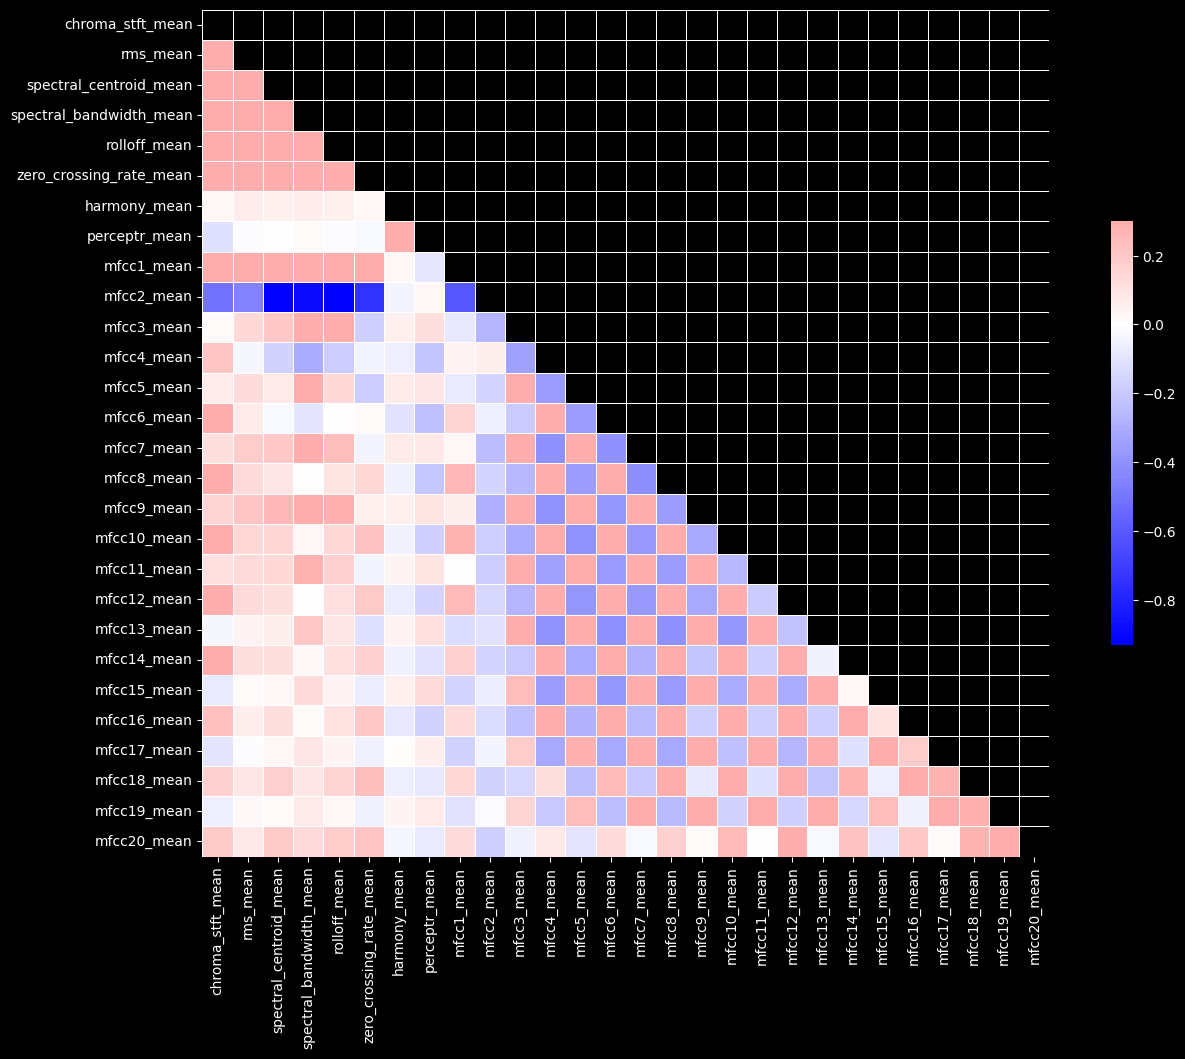

In [6]:
spike = [col for col in df.columns if 'mean' in col]  #creating co-relation map
corr = df[spike].corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(16, 11))

sns.heatmap(corr, mask=mask, cmap="bwr", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

In [7]:
df.isnull().sum() # checking for missing values


filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

Text(0, 0.5, 'BPM')

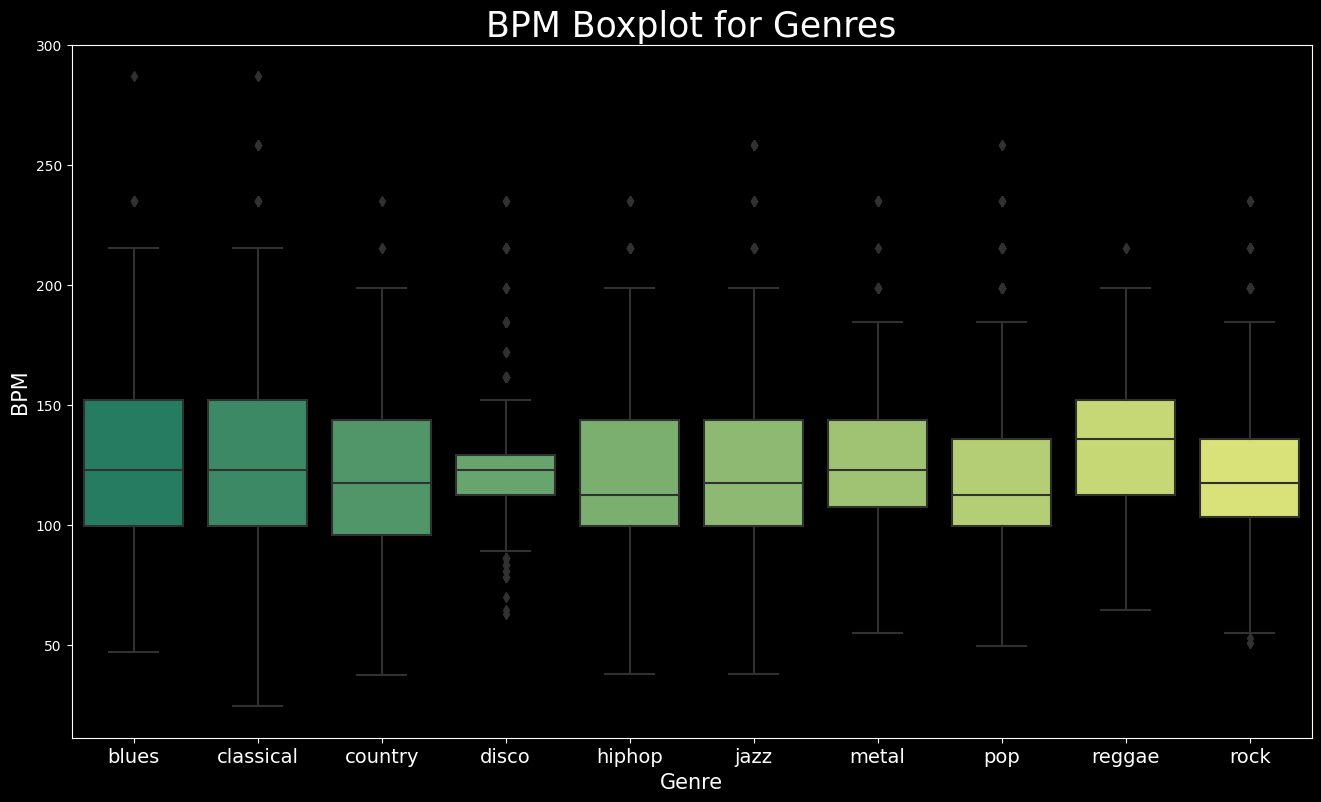

In [8]:
x = df[["label", "tempo"]] #plotting box plot

f, ax = plt.subplots(figsize=(16, 9))
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'summer');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10)
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)

Applying PCA

In [9]:
df = df.iloc[0:, 1:]
y = df['label']
X = df.loc[:, df.columns != 'label']

cols = X.columns
scaler = preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

pca = PCA(n_components=2)
scaled_df = pca.fit_transform(X)
df_p = pd.DataFrame(data = scaled_df, columns = ['pca1', 'pca2'])

fdf = pd.concat([df_p, y], axis = 1)

pca.explained_variance_ratio_

array([0.26745621, 0.18238003])

Text(0, 0.5, 'Principal Component 2')

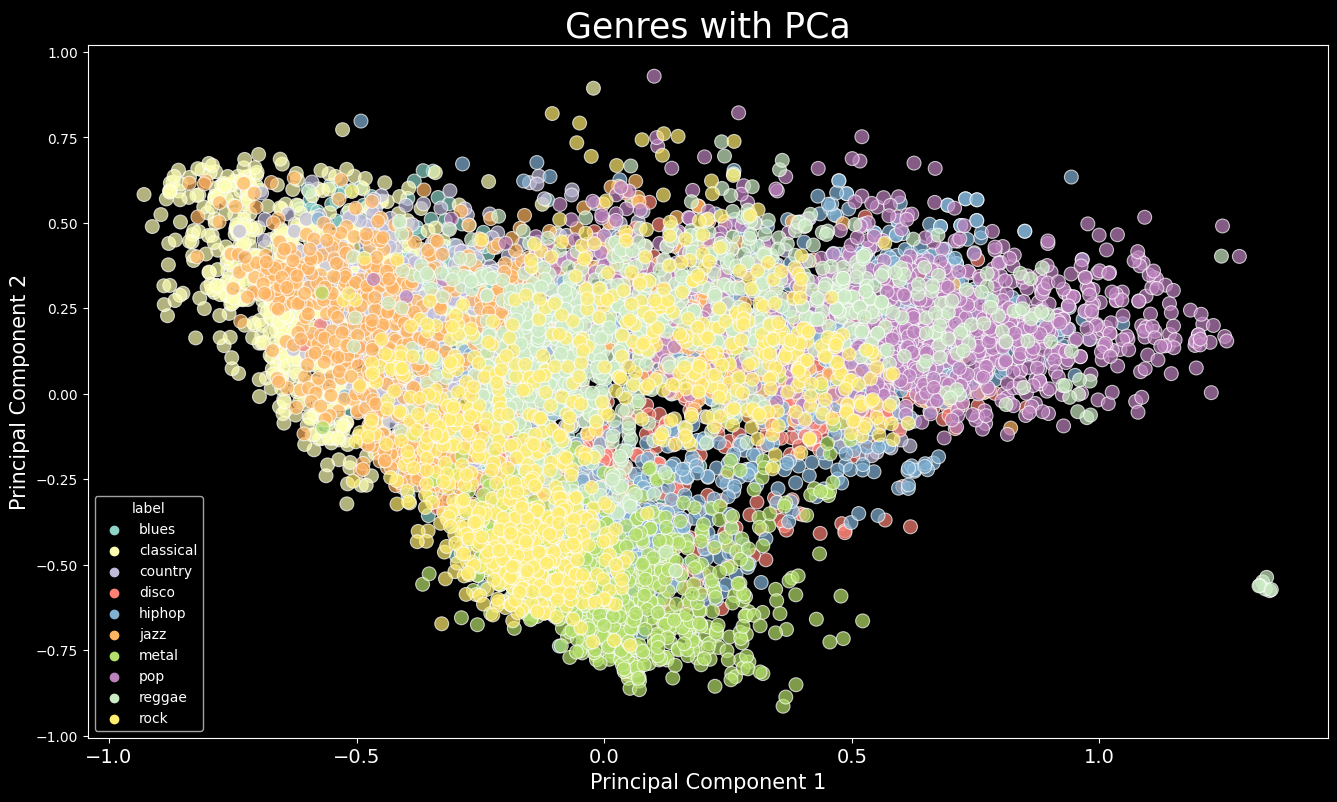

In [10]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "pca1", y = "pca2", data = fdf, hue = "label", alpha = 0.7,
               s = 100)

plt.title('Genres with PCa', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10)
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)

Data Preproccesing

In [11]:
#df = df.drop(labels='filename',axis=1)
df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.63090,1972.744388,117335.77160,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.69087,2010.051501,65671.87567,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.43760,2084.565132,75124.92172,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.28450,1960.039988,82913.63927,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.26765,1948.503884,60204.02027,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [12]:
data = df.iloc[:, :-1] # get the other columns
data

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.63090,1972.744388,117335.77160,3714.560359,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.69087,2010.051501,65671.87567,3869.682242,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.43760,2084.565132,75124.92172,3997.639160,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.28450,1960.039988,82913.63927,3568.300218,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.26765,1948.503884,60204.02027,3469.992864,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.88640,1718.707215,85931.57452,3015.559458,...,5.773784,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969
9986,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.93600,1906.468492,99727.03705,3746.694524,...,2.074155,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033
9987,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.24630,1561.859087,138762.84190,2442.362154,...,-1.005473,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990
9988,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.03920,2018.366254,22860.99256,4313.266226,...,4.123402,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750


In [13]:
labels = df.iloc[:, -1] # get labels column
labels.to_frame()

,label
0,blues
1,blues
2,blues
3,blues
4,blues
...,...
9985,rock
9986,rock
9987,rock
9988,rock


In [14]:
# assign x and y, scale x and encode y
x = np.array(data, dtype = float)
x = scaler.fit_transform(data)
y = encoder.fit_transform(labels)
x.shape, y.shape

((9990, 58), (9990,))

In [15]:
# split data to train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6693, 58), (3297, 58), (6693,), (3297,))

In [16]:

# create an instance of each classification algorithm
g=GaussianNB()
b=BernoulliNB()
KN=KNeighborsClassifier()
D=DecisionTreeClassifier()
XGB=XGBClassifier()

algos=[g,b,KN,D,XGB]
algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','DecisionTreeClassifier','XGBClassifier']
   
accuracy_scored=[]
    
# fit and predict for each Algo
for item in algos:
    item.fit(x_train,y_train)
    item.predict(x_test)
    accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))

In [17]:
# show results in a DataFrame
result = pd.DataFrame(accuracy_scored, columns=["Accuracy"])
result['Algos']=algo_names
result.sort_values('Accuracy',ascending=False)

,Accuracy,Algos
4,0.891113,XGBClassifier
2,0.882924,KNeighborsClassifier
3,0.648165,DecisionTreeClassifier
0,0.515620,GaussianNB
1,0.092812,BernoulliNB


## Finding similar Songs

In [18]:
# Load the dataset and set 'filename' column as the index
df = pd.read_csv(f'C:/Users/DELL/Desktop/Quarter_3/Speech_Processing/Project/Data/features_3_sec.csv', index_col='filename')

# Extract the labels from the 'label' column
labels = df[['label']]

# Remove 'length' and 'label' columns from the dataset
df = df.drop(columns=['length','label'])

# Scale the dataset using standardization
scaled = preprocessing.scale(df)

# Print the type of the scaled data
print('Scaled data type:', type(scaled))

# Compute the cosine similarity matrix for the scaled data
similarity = cosine_similarity(scaled)

# Print the shape of the similarity matrix
print("Similarity shape:", similarity.shape)

# Create a DataFrame of the similarity matrix and set the index and column names to the filenames
sim_df_labels = pd.DataFrame(similarity)
sim_df_names = sim_df_labels.set_index(labels.index)
sim_df_names.columns = labels.index

# Print the similarity matrix
sim_df_names


Scaled data type: <class 'numpy.ndarray'>
Similarity shape: (9990, 9990)


filename,blues.00000.0.wav,blues.00000.1.wav,blues.00000.2.wav,blues.00000.3.wav,blues.00000.4.wav,blues.00000.5.wav,blues.00000.6.wav,blues.00000.7.wav,blues.00000.8.wav,blues.00000.9.wav,...,rock.00099.0.wav,rock.00099.1.wav,rock.00099.2.wav,rock.00099.3.wav,rock.00099.4.wav,rock.00099.5.wav,rock.00099.6.wav,rock.00099.7.wav,rock.00099.8.wav,rock.00099.9.wav
filename,,,,,,,,,,,,,,,,,,,,,
blues.00000.0.wav,1.000000,0.566223,0.574239,0.762002,0.761645,0.650941,0.695497,0.766533,0.760135,0.627689,...,0.221833,0.154208,-0.013789,0.372188,0.456639,0.387531,0.382302,0.048049,0.457811,0.353020
blues.00000.1.wav,0.566223,1.000000,0.639640,0.749346,0.615946,0.605654,0.692011,0.641136,0.786465,0.765471,...,0.412396,0.519079,-0.069361,0.570347,0.617003,0.634812,0.509725,-0.040774,0.553467,0.329800
blues.00000.2.wav,0.574239,0.639640,1.000000,0.659546,0.715466,0.595426,0.750552,0.733546,0.525334,0.580206,...,0.290420,0.320015,0.056435,0.469342,0.306737,0.432975,0.198400,0.037191,0.530360,0.192676
blues.00000.3.wav,0.762002,0.749346,0.659546,1.000000,0.796544,0.787117,0.772267,0.810613,0.729950,0.617242,...,0.257953,0.348761,-0.088099,0.524289,0.524339,0.515108,0.395786,-0.035469,0.542242,0.327122
blues.00000.4.wav,0.761645,0.615946,0.715466,0.796544,1.000000,0.749515,0.806425,0.843051,0.619045,0.618250,...,0.339456,0.362799,-0.159643,0.502493,0.489419,0.527737,0.423894,-0.091949,0.589148,0.380534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rock.00099.5.wav,0.387531,0.634812,0.432975,0.515108,0.527737,0.455920,0.514065,0.525341,0.439123,0.584961,...,0.673853,0.498818,-0.042491,0.616053,0.826042,1.000000,0.744165,0.056462,0.608186,0.548458
rock.00099.6.wav,0.382302,0.509725,0.198400,0.395786,0.423894,0.418646,0.402773,0.300973,0.376382,0.504529,...,0.497874,0.449029,-0.075644,0.596243,0.787911,0.744165,1.000000,-0.012411,0.531216,0.509811
rock.00099.7.wav,0.048049,-0.040774,0.037191,-0.035469,-0.091949,-0.186678,-0.019277,-0.063080,0.073449,-0.059810,...,0.074583,0.255665,0.904822,0.221534,0.003949,0.056462,-0.012411,1.000000,0.162598,0.113301


In [19]:
def find_similar_songs(name):
    # Get the similarity values for the given song and sort them in descending order
    series = sim_df_names[name].sort_values(ascending = False)
    
    # Drop the given song from the list of similar songs
    series = series.drop(name)
    
    # Print the top 5 similar songs to the given song
    print("\n*******\nSimilar songs to ", name)
    print(series.head(5))

In [20]:
import IPython.display as ipd

find_similar_songs('rock.00016.wav') 

ipd.Audio(f"C:/Users/DELL/Desktop/Quarter_3/Speech_Processing/Project/Data/genres_original/rock/rock.00016.wav")

KeyError: 'rock.00016.wav'

In [ ]:
ipd.Audio(f'C:/Users/DELL/Desktop/Quarter_3/Speech_Processing/Project/Data/genres_original/metal/metal.00058.wav')

In [ ]:
ipd.Audio(f'C:/Users/DELL/Desktop/Quarter_3/Speech_Processing/Project/Data/genres_original/rock/rock.00017.wav')